In [103]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:\Windows\Fonts\malgun.ttf'  # 여기에 사용할 한글 폰트의 경로를 입력합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [45]:
import geopandas as gpd

# 강남구 행정동 geometry

In [46]:
gangnam_gpd = gpd.read_file('geo_json/gangnam_emd_2.geojson')
gangnam_gpd

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11680101,Yeoksam-dong,역삼동,"MULTIPOLYGON (((960137.16506 1945122.85047, 96..."
1,11680103,Gaepo-dong,개포동,"MULTIPOLYGON (((960034.64682 1942684.83850, 96..."
2,11680104,Cheongdam-dong,청담동,"MULTIPOLYGON (((959934.75568 1948388.97419, 95..."
3,11680105,Samseong-dong,삼성동,"MULTIPOLYGON (((961603.39835 1947396.38098, 96..."
4,11680106,Daechi-dong,대치동,"MULTIPOLYGON (((961897.40744 1945756.31535, 96..."
5,11680107,Sinsa-dong,신사동,"MULTIPOLYGON (((957750.89941 1946531.97048, 95..."
6,11680108,Nonhyeon-dong,논현동,"MULTIPOLYGON (((959462.16926 1946535.46164, 95..."
7,11680110,Apgujeong-dong,압구정동,"MULTIPOLYGON (((957365.67003 1948406.97101, 95..."
8,11680111,Segok-dong,세곡동,"MULTIPOLYGON (((966663.97820 1941062.69075, 96..."
9,11680112,Jagok-dong,자곡동,"MULTIPOLYGON (((964967.15667 1942954.26855, 96..."


In [47]:
gangnam_gpd = gangnam_gpd.set_crs(epsg='5178', allow_override=True)
gangnam_gpd = gangnam_gpd.to_crs(epsg='4326')
gangnam_gpd.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11680101,Yeoksam-dong,역삼동,"MULTIPOLYGON (((127.04683 37.50727, 127.04704 ..."
1,11680103,Gaepo-dong,개포동,"MULTIPOLYGON (((127.04580 37.48529, 127.04936 ..."
2,11680104,Cheongdam-dong,청담동,"MULTIPOLYGON (((127.04436 37.53670, 127.04436 ..."
3,11680105,Samseong-dong,삼성동,"MULTIPOLYGON (((127.06330 37.52782, 127.06330 ..."
4,11680106,Daechi-dong,대치동,"MULTIPOLYGON (((127.06671 37.51305, 127.06671 ..."


In [48]:
gangnam_gpd['center_point'] = gangnam_gpd['geometry'].geometry.centroid
gangnam_gpd['geometry'] = gangnam_gpd['geometry'].to_crs(epsg='4326')
gangnam_gpd['center_point'] = gangnam_gpd['center_point'].to_crs(epsg='4326')
gangnam_gpd['경도'] = gangnam_gpd['center_point'].map(lambda x: x.xy[0][0])
gangnam_gpd['위도'] = gangnam_gpd['center_point'].map(lambda x: x.xy[1][0])
gangnam_gpd.head()

C:\Users\imhye\AppData\Local\Temp\ipykernel_37820\377723971.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gangnam_gpd['center_point'] = gangnam_gpd['geometry'].geometry.centroid


,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry,center_point,경도,위도
0,11680101,Yeoksam-dong,역삼동,"MULTIPOLYGON (((127.04683 37.50727, 127.04704 ...",POINT (127.03639 37.50283),127.036389,37.502829
1,11680103,Gaepo-dong,개포동,"MULTIPOLYGON (((127.04580 37.48529, 127.04936 ...",POINT (127.06043 37.48303),127.060434,37.483028
2,11680104,Cheongdam-dong,청담동,"MULTIPOLYGON (((127.04436 37.53670, 127.04436 ...",POINT (127.04831 37.52715),127.048312,37.527146
3,11680105,Samseong-dong,삼성동,"MULTIPOLYGON (((127.06330 37.52782, 127.06330 ...",POINT (127.05396 37.51672),127.053962,37.516720
4,11680106,Daechi-dong,대치동,"MULTIPOLYGON (((127.06671 37.51305, 127.06671 ...",POINT (127.06119 37.50194),127.061187,37.501941


In [49]:
# 컬럼명 변환
gangnam_gpd = gangnam_gpd.rename(columns={'EMD_CD':'행정동_코드', 'EMD_KOR_NM':'행정동_코드_명'})
gangnam_gpd

,행정동_코드,EMD_ENG_NM,행정동_코드_명,geometry,center_point,경도,위도
0,11680101,Yeoksam-dong,역삼동,"MULTIPOLYGON (((127.04683 37.50727, 127.04704 ...",POINT (127.03639 37.50283),127.036389,37.502829
1,11680103,Gaepo-dong,개포동,"MULTIPOLYGON (((127.04580 37.48529, 127.04936 ...",POINT (127.06043 37.48303),127.060434,37.483028
2,11680104,Cheongdam-dong,청담동,"MULTIPOLYGON (((127.04436 37.53670, 127.04436 ...",POINT (127.04831 37.52715),127.048312,37.527146
3,11680105,Samseong-dong,삼성동,"MULTIPOLYGON (((127.06330 37.52782, 127.06330 ...",POINT (127.05396 37.51672),127.053962,37.516720
4,11680106,Daechi-dong,대치동,"MULTIPOLYGON (((127.06671 37.51305, 127.06671 ...",POINT (127.06119 37.50194),127.061187,37.501941
5,11680107,Sinsa-dong,신사동,"MULTIPOLYGON (((127.01975 37.51986, 127.01736 ...",POINT (127.02434 37.52656),127.024342,37.526557
6,11680108,Nonhyeon-dong,논현동,"MULTIPOLYGON (((127.03911 37.51997, 127.03948 ...",POINT (127.02955 37.51643),127.029552,37.516430
7,11680110,Apgujeong-dong,압구정동,"MULTIPOLYGON (((127.01528 37.53674, 127.01559 ...",POINT (127.02632 37.53349),127.026319,37.533486
8,11680111,Segok-dong,세곡동,"MULTIPOLYGON (((127.12086 37.47093, 127.12098 ...",POINT (127.10244 37.46712),127.102439,37.467121
9,11680112,Jagok-dong,자곡동,"MULTIPOLYGON (((127.10158 37.48792, 127.10160 ...",POINT (127.09819 37.47902),127.098194,37.479020


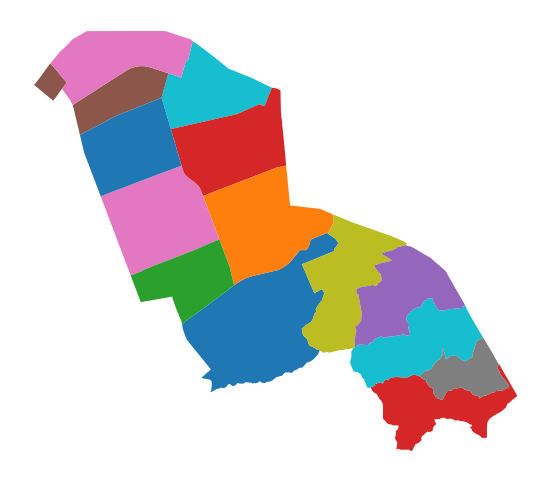

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
gangnam_gpd.plot(column='행정동_코드_명', ax=ax)
plt.axis('off')
plt.show()

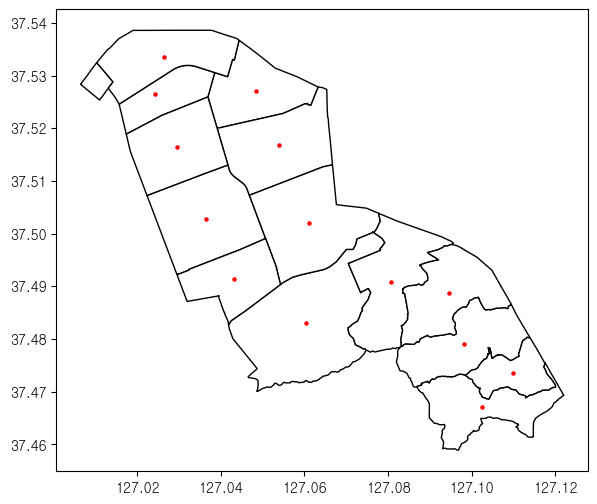

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
gangnam_gpd.plot(ax=ax, color='white', edgecolor='black')
gangnam_gpd['center_point'].plot(marker='o', color='red', markersize=5, ax=ax)
plt.show()

# 강남구 상권별 geometry 시각화

In [52]:
import pandas as pd

# CSV 파일을 'euc-kr' 인코딩으로 불러옵니다.
com_df = pd.read_csv('data/(영역-상권) (1).csv', encoding='euc-kr')
com_df

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093,453418,11110,종로구,11110515,청운효자동,149264
1,A,골목상권,3110009,자하문터널,196991,455057,11110,종로구,11110550,부암동,178306
2,A,골목상권,3110010,평창동서측,197064,456643,11110,종로구,11110560,평창동,369415
3,A,골목상권,3110017,정독도서관,198581,453781,11110,종로구,11110600,가회동,83855
4,A,골목상권,3110018,중앙고등학교,198883,453690,11110,종로구,11110600,가회동,166872
...,...,...,...,...,...,...,...,...,...,...,...
1645,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,198397,451614,11140,중구,11140520,소공동,983618
1646,U,관광특구,3001493,동대문패션타운 관광특구,200996,451976,11140,중구,11140590,광희동,606058
1647,U,관광특구,3001494,종로?청계 관광특구,199796,452274,11110,종로구,11110615,종로1?2?3?4가동,653127
1648,U,관광특구,3001495,잠실 관광특구,210188,446334,11710,송파구,11710562,방이2동,2462734


In [53]:
gncom_df = com_df.loc[com_df['자치구_코드_명']=='강남구'].reset_index(drop=True)
gncom_df

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,A,골목상권,3110968,강남구청역 2번,203552,446131,11680,강남구,11680531,논현2동,43750
1,A,골목상권,3110969,베르사이유1아파트,203564,444383,11680,강남구,11680650,역삼2동,55302
2,A,골목상권,3110970,학동초등학교,203644,445789,11680,강남구,11680531,논현2동,50014
3,A,골목상권,3110971,선정릉역 4번,203791,445313,11680,강남구,11680640,역삼1동,133222
4,A,골목상권,3110972,강남세브란스병원미래의학연구센터,203759,443901,11680,강남구,11680650,역삼2동,46603
...,...,...,...,...,...,...,...,...,...,...,...
98,R,전통시장,3130307,도곡시장,204573,444284,11680,강남구,11680650,역삼2동,7462
99,R,전통시장,3130308,청담삼익시장,205090,446987,11680,강남구,11680565,청담동,7529
100,R,전통시장,3130309,은마종합상점가,205628,444032,11680,강남구,11680610,대치2동,30661
101,R,전통시장,3130310,강남개포시장,205978,443274,11680,강남구,11680670,개포2동,25364


In [54]:
# 자치구 코드, 코드명 삭제
gncom_df = gncom_df.drop(columns=['자치구_코드', '자치구_코드_명'])
gncom_df

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,행정동_코드,행정동_코드_명,영역_면적
0,A,골목상권,3110968,강남구청역 2번,203552,446131,11680531,논현2동,43750
1,A,골목상권,3110969,베르사이유1아파트,203564,444383,11680650,역삼2동,55302
2,A,골목상권,3110970,학동초등학교,203644,445789,11680531,논현2동,50014
3,A,골목상권,3110971,선정릉역 4번,203791,445313,11680640,역삼1동,133222
4,A,골목상권,3110972,강남세브란스병원미래의학연구센터,203759,443901,11680650,역삼2동,46603
...,...,...,...,...,...,...,...,...,...
98,R,전통시장,3130307,도곡시장,204573,444284,11680650,역삼2동,7462
99,R,전통시장,3130308,청담삼익시장,205090,446987,11680565,청담동,7529
100,R,전통시장,3130309,은마종합상점가,205628,444032,11680610,대치2동,30661
101,R,전통시장,3130310,강남개포시장,205978,443274,11680670,개포2동,25364


In [55]:
# 좌표 컬럼명 변경
gncom_df = gncom_df.rename(columns={'엑스좌표_값':'상권_엑스좌표', '와이좌표_값':'상권_와이좌표'})
gncom_df

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,상권_엑스좌표,상권_와이좌표,행정동_코드,행정동_코드_명,영역_면적
0,A,골목상권,3110968,강남구청역 2번,203552,446131,11680531,논현2동,43750
1,A,골목상권,3110969,베르사이유1아파트,203564,444383,11680650,역삼2동,55302
2,A,골목상권,3110970,학동초등학교,203644,445789,11680531,논현2동,50014
3,A,골목상권,3110971,선정릉역 4번,203791,445313,11680640,역삼1동,133222
4,A,골목상권,3110972,강남세브란스병원미래의학연구센터,203759,443901,11680650,역삼2동,46603
...,...,...,...,...,...,...,...,...,...
98,R,전통시장,3130307,도곡시장,204573,444284,11680650,역삼2동,7462
99,R,전통시장,3130308,청담삼익시장,205090,446987,11680565,청담동,7529
100,R,전통시장,3130309,은마종합상점가,205628,444032,11680610,대치2동,30661
101,R,전통시장,3130310,강남개포시장,205978,443274,11680670,개포2동,25364


In [56]:
# GeoDataFrame 만들기
import geopandas as gpd
from shapely.geometry import Point

gncom_geometry = [Point(xy) for xy in zip(gncom_df['상권_엑스좌표'], gncom_df['상권_와이좌표'])]
gncom_gdf = gpd.GeoDataFrame(gncom_df, geometry=gncom_geometry, crs='EPSG:5181')
gncom_gdf

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,상권_엑스좌표,상권_와이좌표,행정동_코드,행정동_코드_명,영역_면적,geometry
0,A,골목상권,3110968,강남구청역 2번,203552,446131,11680531,논현2동,43750,POINT (203552.000 446131.000)
1,A,골목상권,3110969,베르사이유1아파트,203564,444383,11680650,역삼2동,55302,POINT (203564.000 444383.000)
2,A,골목상권,3110970,학동초등학교,203644,445789,11680531,논현2동,50014,POINT (203644.000 445789.000)
3,A,골목상권,3110971,선정릉역 4번,203791,445313,11680640,역삼1동,133222,POINT (203791.000 445313.000)
4,A,골목상권,3110972,강남세브란스병원미래의학연구센터,203759,443901,11680650,역삼2동,46603,POINT (203759.000 443901.000)
...,...,...,...,...,...,...,...,...,...,...
98,R,전통시장,3130307,도곡시장,204573,444284,11680650,역삼2동,7462,POINT (204573.000 444284.000)
99,R,전통시장,3130308,청담삼익시장,205090,446987,11680565,청담동,7529,POINT (205090.000 446987.000)
100,R,전통시장,3130309,은마종합상점가,205628,444032,11680610,대치2동,30661,POINT (205628.000 444032.000)
101,R,전통시장,3130310,강남개포시장,205978,443274,11680670,개포2동,25364,POINT (205978.000 443274.000)


In [57]:
gncom_gdf['geometry'] = gncom_gdf['geometry'].to_crs(epsg='4326')
gncom_gdf

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,상권_엑스좌표,상권_와이좌표,행정동_코드,행정동_코드_명,영역_면적,geometry
0,A,골목상권,3110968,강남구청역 2번,203552,446131,11680531,논현2동,43750,POINT (127.04018 37.51465)
1,A,골목상권,3110969,베르사이유1아파트,203564,444383,11680650,역삼2동,55302,POINT (127.04030 37.49890)
2,A,골목상권,3110970,학동초등학교,203644,445789,11680531,논현2동,50014,POINT (127.04122 37.51157)
3,A,골목상권,3110971,선정릉역 4번,203791,445313,11680640,역삼1동,133222,POINT (127.04288 37.50728)
4,A,골목상권,3110972,강남세브란스병원미래의학연구센터,203759,443901,11680650,역삼2동,46603,POINT (127.04251 37.49456)
...,...,...,...,...,...,...,...,...,...,...
98,R,전통시장,3130307,도곡시장,204573,444284,11680650,역삼2동,7462,POINT (127.05171 37.49801)
99,R,전통시장,3130308,청담삼익시장,205090,446987,11680565,청담동,7529,POINT (127.05758 37.52236)
100,R,전통시장,3130309,은마종합상점가,205628,444032,11680610,대치2동,30661,POINT (127.06364 37.49573)
101,R,전통시장,3130310,강남개포시장,205978,443274,11680670,개포2동,25364,POINT (127.06759 37.48890)


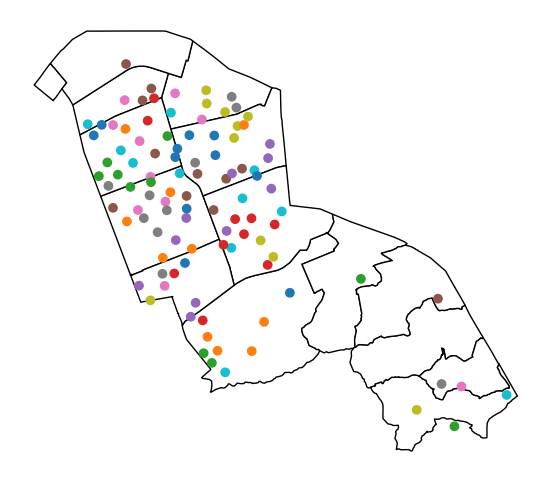

In [58]:
# 시각화1

fig, ax = plt.subplots(figsize=(10, 6))
gangnam_gpd.plot(ax=ax, color='white', edgecolor='black')
gncom_gdf.plot(column='상권_코드_명', ax=ax)
plt.axis('off')
plt.show()

C:\Users\imhye\AppData\Local\Temp\ipykernel_37820\3918927204.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gncom_gdf.plot(column='상권_코드_명', ax=ax, marker='o', color='red', markersize=10)


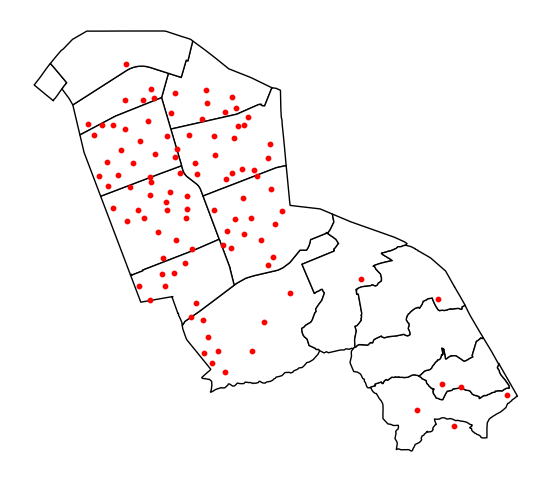

In [59]:
# 시각화2
fig, ax = plt.subplots(figsize=(10, 6))
gangnam_gpd.plot(ax=ax, color='white', edgecolor='black')
gncom_gdf.plot(column='상권_코드_명', ax=ax, marker='o', color='red', markersize=10)
plt.axis('off')
plt.show()

# data/final_reordered.csv 데이터와 병합

In [60]:
# 전처리 된 데이터 불러오기
nf_reordered = pd.read_csv('data/final_reordered.csv')
nf_reordered.head()

,시간대_매출금액,기준_년,기준_분기,시간대,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,자치구_코드,자치구_코드_명,...,시간대_유동인구_수,평일_유동인구_수_평균,주말_유동인구_수_평균,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,소득_구간_코드,지출_총금액
0,605774191.0,2021,1,21~24,A,골목상권,3110955,논현초등학교,11680.0,강남구,...,344558.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09
1,531497598.0,2021,1,17~21,A,골목상권,3110955,논현초등학교,11680.0,강남구,...,433632.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09
2,230188421.0,2021,1,14~17,A,골목상권,3110955,논현초등학교,11680.0,강남구,...,342564.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09
3,192457360.0,2021,1,11~14,A,골목상권,3110955,논현초등학교,11680.0,강남구,...,351383.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09
4,222467605.0,2021,1,06~11,A,골목상권,3110955,논현초등학교,11680.0,강남구,...,621019.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09


In [61]:
nf_reordered.dtypes

시간대_매출금액        float64
기준_년              int64
기준_분기             int64
시간대              object
상권_구분_코드         object
상권_구분_코드_명       object
상권_코드             int64
상권_코드_명          object
자치구_코드          float64
자치구_코드_명         object
행정동_코드          float64
행정동_코드_명         object
시간대_유동인구_수      float64
평일_유동인구_수_평균    float64
주말_유동인구_수_평균    float64
총_직장_인구_수       float64
총_상주인구_수        float64
총_가구_수          float64
집객시설_수          float64
월_평균_소득_금액      float64
소득_구간_코드        float64
지출_총금액          float64
dtype: object

In [62]:
# 주요 데이터형 바꾸기 : 범주형 데이터가 float64인 경우, int64로 변경
nf_reordered['행정동_코드'] = nf_reordered['행정동_코드'].astype('int64')
nf_reordered.dtypes

시간대_매출금액        float64
기준_년              int64
기준_분기             int64
시간대              object
상권_구분_코드         object
상권_구분_코드_명       object
상권_코드             int64
상권_코드_명          object
자치구_코드          float64
자치구_코드_명         object
행정동_코드            int64
행정동_코드_명         object
시간대_유동인구_수      float64
평일_유동인구_수_평균    float64
주말_유동인구_수_평균    float64
총_직장_인구_수       float64
총_상주인구_수        float64
총_가구_수          float64
집객시설_수          float64
월_평균_소득_금액      float64
소득_구간_코드        float64
지출_총금액          float64
dtype: object

In [63]:
nf_reordered = nf_reordered.drop(columns=['상권_구분_코드_명', '상권_코드_명', '자치구_코드', '자치구_코드_명', '행정동_코드_명'])
nf_reordered

,시간대_매출금액,기준_년,기준_분기,시간대,상권_구분_코드,상권_코드,행정동_코드,시간대_유동인구_수,평일_유동인구_수_평균,주말_유동인구_수_평균,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,소득_구간_코드,지출_총금액
0,605774191.0,2021,1,21~24,A,3110955,11680521,344558.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2.909460e+06,6.0,4.481561e+09
1,531497598.0,2021,1,17~21,A,3110955,11680521,433632.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2.909460e+06,6.0,4.481561e+09
2,230188421.0,2021,1,14~17,A,3110955,11680521,342564.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2.909460e+06,6.0,4.481561e+09
3,192457360.0,2021,1,11~14,A,3110955,11680521,351383.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2.909460e+06,6.0,4.481561e+09
4,222467605.0,2021,1,06~11,A,3110955,11680521,621019.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2.909460e+06,6.0,4.481561e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,638129296.0,2023,3,17~21,U,3001496,11680580,24541.0,17926.0,13594.5,15904.0,19.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
3926,565180018.0,2023,3,14~17,U,3001496,11680580,28982.0,17926.0,13594.5,15904.0,19.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
3927,612070786.0,2023,3,11~14,U,3001496,11680580,28119.0,17926.0,13594.5,15904.0,19.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
3928,596794285.0,2023,3,06~11,U,3001496,11680580,22047.0,17926.0,13594.5,15904.0,19.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08


In [64]:
gncom_gdf = gncom_gdf.drop(columns=['상권_구분_코드', '상권_구분_코드_명', '행정동_코드_명'])
gncom_gdf

,상권_코드,상권_코드_명,상권_엑스좌표,상권_와이좌표,행정동_코드,영역_면적,geometry
0,3110968,강남구청역 2번,203552,446131,11680531,43750,POINT (127.04018 37.51465)
1,3110969,베르사이유1아파트,203564,444383,11680650,55302,POINT (127.04030 37.49890)
2,3110970,학동초등학교,203644,445789,11680531,50014,POINT (127.04122 37.51157)
3,3110971,선정릉역 4번,203791,445313,11680640,133222,POINT (127.04288 37.50728)
4,3110972,강남세브란스병원미래의학연구센터,203759,443901,11680650,46603,POINT (127.04251 37.49456)
...,...,...,...,...,...,...,...
98,3130307,도곡시장,204573,444284,11680650,7462,POINT (127.05171 37.49801)
99,3130308,청담삼익시장,205090,446987,11680565,7529,POINT (127.05758 37.52236)
100,3130309,은마종합상점가,205628,444032,11680610,30661,POINT (127.06364 37.49573)
101,3130310,강남개포시장,205978,443274,11680670,25364,POINT (127.06759 37.48890)


In [65]:
# 데이터 병합
merged_gdf = gncom_gdf.merge(nf_reordered, on=['상권_코드', '행정동_코드'])
merged_gdf

,상권_코드,상권_코드_명,상권_엑스좌표,상권_와이좌표,행정동_코드,영역_면적,geometry,시간대_매출금액,기준_년,기준_분기,...,시간대_유동인구_수,평일_유동인구_수_평균,주말_유동인구_수_평균,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,소득_구간_코드,지출_총금액
0,3110971,선정릉역 4번,203791,445313,11680640,133222,POINT (127.04288 37.50728),429160889.0,2021,1,...,112722.0,150564.2,128317.0,1542.0,3870.0,2549.0,1.0,3.432046e+06,7.0,3.043233e+09
1,3110971,선정릉역 4번,203791,445313,11680640,133222,POINT (127.04288 37.50728),505553547.0,2021,1,...,144801.0,150564.2,128317.0,1542.0,3870.0,2549.0,1.0,3.432046e+06,7.0,3.043233e+09
2,3110971,선정릉역 4번,203791,445313,11680640,133222,POINT (127.04288 37.50728),219028437.0,2021,1,...,129215.0,150564.2,128317.0,1542.0,3870.0,2549.0,1.0,3.432046e+06,7.0,3.043233e+09
3,3110971,선정릉역 4번,203791,445313,11680640,133222,POINT (127.04288 37.50728),220179086.0,2021,1,...,135055.0,150564.2,128317.0,1542.0,3870.0,2549.0,1.0,3.432046e+06,7.0,3.043233e+09
4,3110971,선정릉역 4번,203791,445313,11680640,133222,POINT (127.04288 37.50728),189463290.0,2021,1,...,222884.0,150564.2,128317.0,1542.0,3870.0,2549.0,1.0,3.432046e+06,7.0,3.043233e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,3001496,강남 마이스 관광특구,205282,445736,11680580,237892,POINT (127.05974 37.51108),638129296.0,2023,3,...,24541.0,17926.0,13594.5,15904.0,19.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
3926,3001496,강남 마이스 관광특구,205282,445736,11680580,237892,POINT (127.05974 37.51108),565180018.0,2023,3,...,28982.0,17926.0,13594.5,15904.0,19.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
3927,3001496,강남 마이스 관광특구,205282,445736,11680580,237892,POINT (127.05974 37.51108),612070786.0,2023,3,...,28119.0,17926.0,13594.5,15904.0,19.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
3928,3001496,강남 마이스 관광특구,205282,445736,11680580,237892,POINT (127.05974 37.51108),596794285.0,2023,3,...,22047.0,17926.0,13594.5,15904.0,19.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08


In [67]:
merged_gdf.loc[(merged_gdf['상권_코드']==3110971)&(merged_gdf['기준_년']==2023), ['기준_년', '기준_분기', '시간대', '시간대_매출금액']]

,기준_년,기준_분기,시간대,시간대_매출금액
48,2023,1,21~24,346273560.0
49,2023,1,17~21,397622851.0
50,2023,1,14~17,228265654.0
51,2023,1,11~14,231240679.0
52,2023,1,06~11,246661960.0
53,2023,1,00~06,274852831.0
54,2023,2,21~24,373742772.0
55,2023,2,17~21,426866446.0
56,2023,2,14~17,275228982.0
57,2023,2,11~14,247063448.0


In [68]:
example_1 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='00~06')].reset_index(drop=True)
example_2 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='06~11')].reset_index(drop=True)
example_3 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='11~14')].reset_index(drop=True)
example_4 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='14~17')].reset_index(drop=True)
example_5 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='17~21')].reset_index(drop=True)
example_6 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='21~24')].reset_index(drop=True)

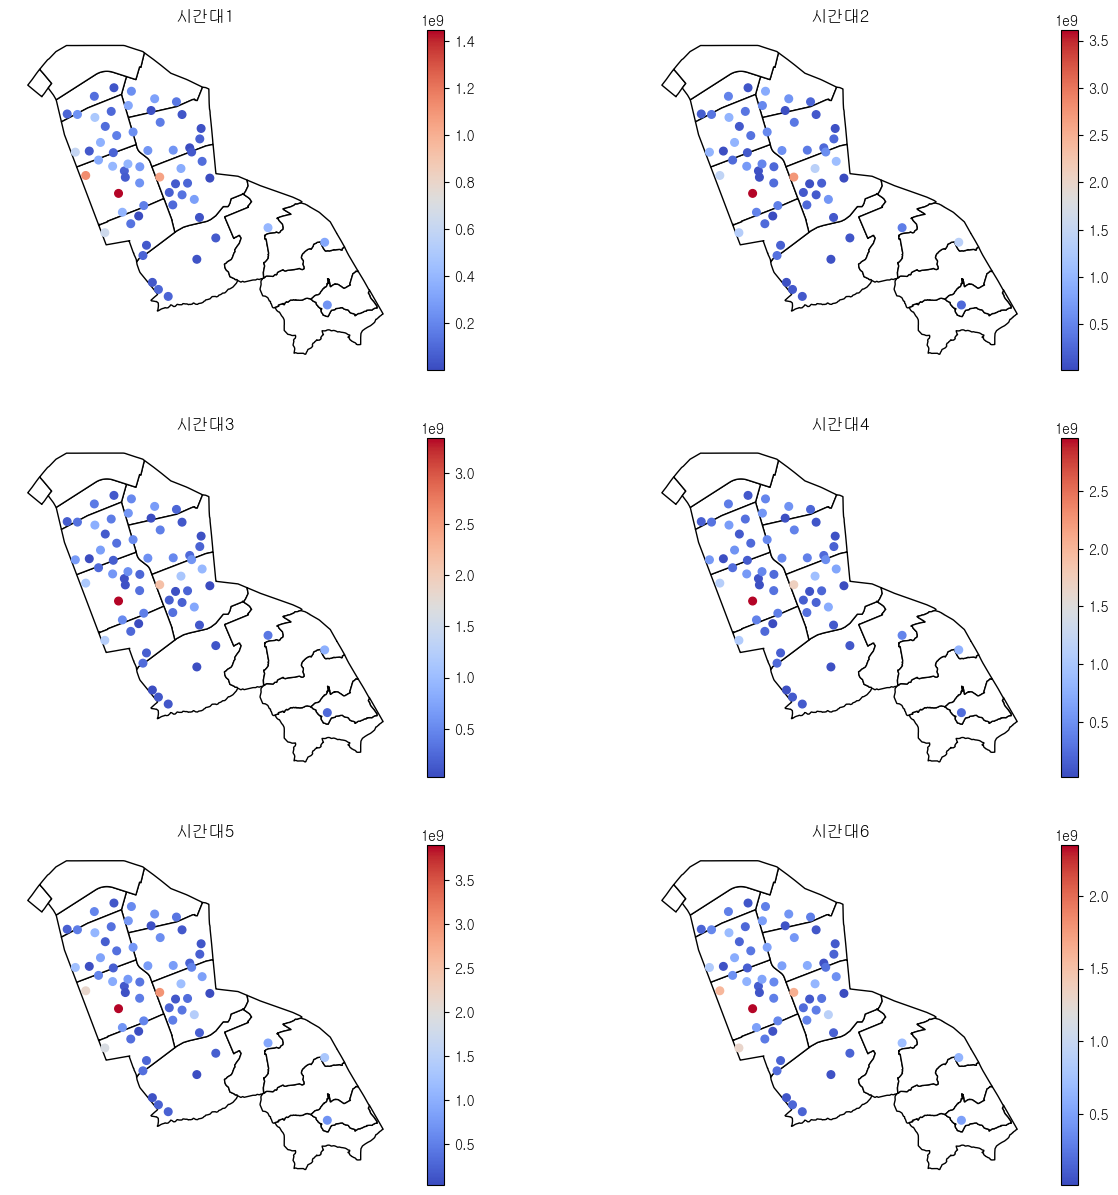

In [69]:
# 시각화
# 2003년 1분기 시간대별 시각화

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# 시간대 : 1
ax[0, 0].set_title('시간대1')
gangnam_gpd.plot(ax=ax[0, 0], color='white', edgecolor='black')
example_1.plot(column='시간대_매출금액', ax=ax[0, 0], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[0, 0].axis('off')

# 시간대 : 2
ax[0, 1].set_title('시간대2')
gangnam_gpd.plot(ax=ax[0, 1], color='white', edgecolor='black')
example_2.plot(column='시간대_매출금액', ax=ax[0, 1], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[0, 1].axis('off')

# 시간대 : 3
ax[1, 0].set_title('시간대3')
gangnam_gpd.plot(ax=ax[1, 0], color='white', edgecolor='black')
example_3.plot(column='시간대_매출금액', ax=ax[1, 0], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[1, 0].axis('off')

# 시간대 : 4
ax[1, 1].set_title('시간대4')
gangnam_gpd.plot(ax=ax[1, 1], color='white', edgecolor='black')
example_4.plot(column='시간대_매출금액', ax=ax[1, 1], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[1, 1].axis('off')

# 시간대 : 5
ax[2, 0].set_title('시간대5')
gangnam_gpd.plot(ax=ax[2, 0], color='white', edgecolor='black')
example_5.plot(column='시간대_매출금액', ax=ax[2, 0], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[2, 0].axis('off')

# 시간대 : 6
ax[2, 1].set_title('시간대6')
gangnam_gpd.plot(ax=ax[2, 1], color='white', edgecolor='black')
example_6.plot(column='시간대_매출금액', ax=ax[2, 1], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[2, 1].axis('off')

plt.show()

# 폴리곤 형식

# 강남구 상권별 geometry

In [70]:
import pandas as pd

In [71]:
gncom_df = pd.read_csv('data/영역-상권.csv')
gncom_df

,TRDAR_SE_C,TRDAR_SE_1,TRDAR_CD,TRDAR_CD_N,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,SIGNGU_CD_,ADSTRD_CD,ADSTRD_CD_,RELM_AR,geometry
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093.0,453418.0,11110,종로구,11110515,청운효자동,149264.0,"POLYGON ((196955.8422 453722.1139, 196958.6692..."
1,U,관광특구,3001494,종로·청계 관광특구,199796.0,452274.0,11110,종로구,11110615,종로1·2·3·4가동,653127.0,"POLYGON ((201385.3797 452513.7246, 201385.2841..."
2,R,전통시장,3130021,신설종합시장,201854.0,452569.0,11110,종로구,11110710,숭인2동,9800.0,"POLYGON ((201937.1213 452552.08300000103, 2018..."
3,R,전통시장,3130002,세종마을음식문화거리(금천교시장),197423.0,453030.0,11110,종로구,11110530,사직동,49557.0,"POLYGON ((197550.6696 453079.8868, 197554.0259..."
4,R,전통시장,3130001,통인시장,197351.0,453449.0,11110,종로구,11110515,청운효자동,38280.0,"POLYGON ((197428.0091 453548.216, 197436.6966 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1645,R,전통시장,3130322,고분다리전통시장,211771.0,449208.0,11740,강동구,11740620,천호3동,20499.0,"POLYGON ((211759.8656 449221.0745, 211779.4524..."
1646,R,전통시장,3130323,둔촌역전통시장,211868.0,447599.0,11740,강동구,11740660,성내3동,36613.0,"POLYGON ((211924.7172 447688.583699999, 211931..."
1647,R,전통시장,3130324,길동복조리시장,212690.0,448844.0,11740,강동구,11740685,길동,29464.0,"POLYGON ((212814.4982 448972.66070000106, 2128..."
1648,R,전통시장,3130325,명일전통시장,212839.0,449976.0,11740,강동구,11740530,명일1동,27547.0,"POLYGON ((212922.2636 449886.08300000103, 2129..."


In [72]:
# 컬럼명 바꾸기
gncom_df = gncom_df.rename(columns={'TRDAR_SE_C':'상권_구분_코드', 'TRDAR_SE_1':'상권_구분_코드_명', 'TRDAR_CD':'상권_코드', 'TRDAR_CD_N':'상권_코드_명', 'ADSTRD_CD':'행정동_코드', 'ADSTRD_CD_':'행정동_코드_명'})
gncom_df

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,SIGNGU_CD_,행정동_코드,행정동_코드_명,RELM_AR,geometry
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093.0,453418.0,11110,종로구,11110515,청운효자동,149264.0,"POLYGON ((196955.8422 453722.1139, 196958.6692..."
1,U,관광특구,3001494,종로·청계 관광특구,199796.0,452274.0,11110,종로구,11110615,종로1·2·3·4가동,653127.0,"POLYGON ((201385.3797 452513.7246, 201385.2841..."
2,R,전통시장,3130021,신설종합시장,201854.0,452569.0,11110,종로구,11110710,숭인2동,9800.0,"POLYGON ((201937.1213 452552.08300000103, 2018..."
3,R,전통시장,3130002,세종마을음식문화거리(금천교시장),197423.0,453030.0,11110,종로구,11110530,사직동,49557.0,"POLYGON ((197550.6696 453079.8868, 197554.0259..."
4,R,전통시장,3130001,통인시장,197351.0,453449.0,11110,종로구,11110515,청운효자동,38280.0,"POLYGON ((197428.0091 453548.216, 197436.6966 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1645,R,전통시장,3130322,고분다리전통시장,211771.0,449208.0,11740,강동구,11740620,천호3동,20499.0,"POLYGON ((211759.8656 449221.0745, 211779.4524..."
1646,R,전통시장,3130323,둔촌역전통시장,211868.0,447599.0,11740,강동구,11740660,성내3동,36613.0,"POLYGON ((211924.7172 447688.583699999, 211931..."
1647,R,전통시장,3130324,길동복조리시장,212690.0,448844.0,11740,강동구,11740685,길동,29464.0,"POLYGON ((212814.4982 448972.66070000106, 2128..."
1648,R,전통시장,3130325,명일전통시장,212839.0,449976.0,11740,강동구,11740530,명일1동,27547.0,"POLYGON ((212922.2636 449886.08300000103, 2129..."


In [73]:
# 강남구 데이터만 추출
gncom_df = gncom_df.loc[gncom_df['SIGNGU_CD_']=='강남구'].reset_index(drop=True)
gncom_df.head()

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,SIGNGU_CD_,행정동_코드,행정동_코드_명,RELM_AR,geometry
0,A,골목상권,3110968,강남구청역 2번,203552.0,446131.0,11680,강남구,11680531,논현2동,43750.0,"POLYGON ((203567.5102 446297.293400001, 203589..."
1,U,관광특구,3001496,강남 마이스 관광특구,205282.0,445736.0,11680,강남구,11680580,삼성1동,237892.0,"POLYGON ((205269.6699 445368.3247, 205255.6477..."
2,R,전통시장,3130310,강남개포시장,205978.0,443274.0,11680,강남구,11680670,개포2동,25364.0,"POLYGON ((205951.9007 443209.9231, 205885.3895..."
3,R,전통시장,3130309,은마종합상점가,205628.0,444032.0,11680,강남구,11680610,대치2동,30661.0,"POLYGON ((205690.2824 444077.98179999896, 2057..."
4,R,전통시장,3130308,청담삼익시장,205090.0,446987.0,11680,강남구,11680565,청담동,7529.0,"POLYGON ((205138.51380000002 447022.923800001,..."


In [74]:
# 불필요한 컬럼 제거
gncom_df = gncom_df.drop(columns=['XCNTS_VALU', 'YDNTS_VALU', 'SIGNGU_CD', 'SIGNGU_CD_', 'RELM_AR', '상권_구분_코드', '상권_구분_코드_명'])
gncom_df

,상권_코드,상권_코드_명,행정동_코드,행정동_코드_명,geometry
0,3110968,강남구청역 2번,11680531,논현2동,"POLYGON ((203567.5102 446297.293400001, 203589..."
1,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((205269.6699 445368.3247, 205255.6477..."
2,3130310,강남개포시장,11680670,개포2동,"POLYGON ((205951.9007 443209.9231, 205885.3895..."
3,3130309,은마종합상점가,11680610,대치2동,"POLYGON ((205690.2824 444077.98179999896, 2057..."
4,3130308,청담삼익시장,11680565,청담동,"POLYGON ((205138.51380000002 447022.923800001,..."
...,...,...,...,...,...
98,3110973,강남구청역 4번,11680565,청담동,"POLYGON ((203931.9402 446670.0692, 203984.3809..."
99,3110972,강남세브란스병원미래의학연구센터,11680650,역삼2동,"POLYGON ((203673.6731 444013.3288, 203698.38 4..."
100,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((203543.1798 445522.33070000104, 2035..."
101,3110970,학동초등학교,11680531,논현2동,"POLYGON ((203655.9841 445882.325300001, 203659..."


In [75]:
import geopandas as gpd
from shapely import wkt

# polygon변환
gncom_df['geometry'] = gncom_df['geometry'].apply(wkt.loads)

# geo data frame으로 변환
gncom_gdf = gpd.GeoDataFrame(gncom_df, geometry='geometry', crs='EPSG:5181')
gncom_gdf

,상권_코드,상권_코드_명,행정동_코드,행정동_코드_명,geometry
0,3110968,강남구청역 2번,11680531,논현2동,"POLYGON ((203567.510 446297.293, 203589.725 44..."
1,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((205269.670 445368.325, 205255.648 44..."
2,3130310,강남개포시장,11680670,개포2동,"POLYGON ((205951.901 443209.923, 205885.389 44..."
3,3130309,은마종합상점가,11680610,대치2동,"POLYGON ((205690.282 444077.982, 205712.818 44..."
4,3130308,청담삼익시장,11680565,청담동,"POLYGON ((205138.514 447022.924, 205114.981 44..."
...,...,...,...,...,...
98,3110973,강남구청역 4번,11680565,청담동,"POLYGON ((203931.940 446670.069, 203984.381 44..."
99,3110972,강남세브란스병원미래의학연구센터,11680650,역삼2동,"POLYGON ((203673.673 444013.329, 203698.380 44..."
100,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((203543.180 445522.331, 203573.530 44..."
101,3110970,학동초등학교,11680531,논현2동,"POLYGON ((203655.984 445882.325, 203659.664 44..."


In [76]:
# EPSG:5181을 EPSG:4326으로 바꾸기
gncom_gdf['geometry'] = gncom_gdf['geometry'].to_crs(epsg='4326')
gncom_gdf

,상권_코드,상권_코드_명,행정동_코드,행정동_코드_명,geometry
0,3110968,강남구청역 2번,11680531,논현2동,"POLYGON ((127.04035 37.51615, 127.04060 37.515..."
1,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((127.05960 37.50777, 127.05944 37.507..."
2,3130310,강남개포시장,11680670,개포2동,"POLYGON ((127.06730 37.48832, 127.06655 37.488..."
3,3130309,은마종합상점가,11680610,대치2동,"POLYGON ((127.06435 37.49614, 127.06460 37.495..."
4,3130308,청담삼익시장,11680565,청담동,"POLYGON ((127.05813 37.52268, 127.05786 37.522..."
...,...,...,...,...,...
98,3110973,강남구청역 4번,11680565,청담동,"POLYGON ((127.04448 37.51951, 127.04507 37.519..."
99,3110972,강남세브란스병원미래의학연구센터,11680650,역삼2동,"POLYGON ((127.04154 37.49557, 127.04182 37.494..."
100,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((127.04007 37.50917, 127.04042 37.508..."
101,3110970,학동초등학교,11680531,논현2동,"POLYGON ((127.04135 37.51241, 127.04139 37.512..."


In [77]:
import geopandas as gpd

# 변환된 GeoDataFrame을 지오제이슨 파일로 저장
gncom_gdf.to_file("geo_json/gncom_gdf.geojson", driver='GeoJSON')

In [78]:
import geopandas as gpd

# GeoJSON 파일 경로
file_path = "geo_json/gncom_gdf.geojson"

# GeoJSON 파일을 불러와 GeoDataFrame으로 변환
gncom_gdf= gpd.read_file(file_path)

# 데이터 확인
gncom_gdf

,상권_코드,상권_코드_명,행정동_코드,행정동_코드_명,geometry
0,3110968,강남구청역 2번,11680531,논현2동,"POLYGON ((127.04035 37.51615, 127.04060 37.515..."
1,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((127.05960 37.50777, 127.05944 37.507..."
2,3130310,강남개포시장,11680670,개포2동,"POLYGON ((127.06730 37.48832, 127.06655 37.488..."
3,3130309,은마종합상점가,11680610,대치2동,"POLYGON ((127.06435 37.49614, 127.06460 37.495..."
4,3130308,청담삼익시장,11680565,청담동,"POLYGON ((127.05813 37.52268, 127.05786 37.522..."
...,...,...,...,...,...
98,3110973,강남구청역 4번,11680565,청담동,"POLYGON ((127.04448 37.51951, 127.04507 37.519..."
99,3110972,강남세브란스병원미래의학연구센터,11680650,역삼2동,"POLYGON ((127.04154 37.49557, 127.04182 37.494..."
100,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((127.04007 37.50917, 127.04042 37.508..."
101,3110970,학동초등학교,11680531,논현2동,"POLYGON ((127.04135 37.51241, 127.04139 37.512..."


In [79]:
gncom_gdf['center_point'] = gncom_gdf['geometry'].geometry.centroid
gncom_gdf['geometry'] = gncom_gdf['geometry'].to_crs(epsg='4326')
gncom_gdf['center_point'] = gncom_gdf['center_point'].to_crs(epsg='4326')
gncom_gdf['경도'] = gncom_gdf['center_point'].map(lambda x: x.xy[0][0])
gncom_gdf['위도'] = gncom_gdf['center_point'].map(lambda x: x.xy[1][0])
gncom_gdf

C:\Users\imhye\AppData\Local\Temp\ipykernel_37820\423578619.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gncom_gdf['center_point'] = gncom_gdf['geometry'].geometry.centroid


,상권_코드,상권_코드_명,행정동_코드,행정동_코드_명,geometry,center_point,경도,위도
0,3110968,강남구청역 2번,11680531,논현2동,"POLYGON ((127.04035 37.51615, 127.04060 37.515...",POINT (127.04018 37.51465),127.040183,37.514655
1,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((127.05960 37.50777, 127.05944 37.507...",POINT (127.05974 37.51109),127.059737,37.511085
2,3130310,강남개포시장,11680670,개포2동,"POLYGON ((127.06730 37.48832, 127.06655 37.488...",POINT (127.06760 37.48890),127.067596,37.488895
3,3130309,은마종합상점가,11680610,대치2동,"POLYGON ((127.06435 37.49614, 127.06460 37.495...",POINT (127.06365 37.49573),127.063649,37.495732
4,3130308,청담삼익시장,11680565,청담동,"POLYGON ((127.05813 37.52268, 127.05786 37.522...",POINT (127.05758 37.52236),127.057578,37.522361
...,...,...,...,...,...,...,...,...
98,3110973,강남구청역 4번,11680565,청담동,"POLYGON ((127.04448 37.51951, 127.04507 37.519...",POINT (127.04355 37.51883),127.043547,37.518826
99,3110972,강남세브란스병원미래의학연구센터,11680650,역삼2동,"POLYGON ((127.04154 37.49557, 127.04182 37.494...",POINT (127.04251 37.49455),127.042511,37.494554
100,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((127.04007 37.50917, 127.04042 37.508...",POINT (127.04287 37.50728),127.042874,37.507279
101,3110970,학동초등학교,11680531,논현2동,"POLYGON ((127.04135 37.51241, 127.04139 37.512...",POINT (127.04122 37.51157),127.041218,37.511567


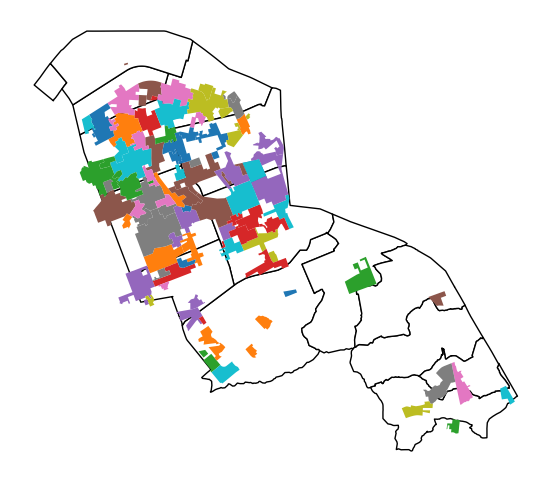

In [80]:
# 상권별 시각화
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
gangnam_gpd.plot(ax=ax, color='white', edgecolor='black')
gncom_gdf.plot(column='상권_코드_명', ax=ax)
plt.axis('off')
plt.show()

In [81]:
# 데이터 병합
merged_gdf = gncom_gdf.merge(nf_reordered, on=['상권_코드', '행정동_코드'])
merged_gdf

,상권_코드,상권_코드_명,행정동_코드,행정동_코드_명,geometry,center_point,경도,위도,시간대_매출금액,기준_년,...,시간대_유동인구_수,평일_유동인구_수_평균,주말_유동인구_수_평균,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,소득_구간_코드,지출_총금액
0,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((127.05960 37.50777, 127.05944 37.507...",POINT (127.05974 37.51109),127.059737,37.511085,164262242.0,2021,...,4777.0,13845.2,9557.5,15904.0,29.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
1,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((127.05960 37.50777, 127.05944 37.507...",POINT (127.05974 37.51109),127.059737,37.511085,399841439.0,2021,...,18978.0,13845.2,9557.5,15904.0,29.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
2,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((127.05960 37.50777, 127.05944 37.507...",POINT (127.05974 37.51109),127.059737,37.511085,326209836.0,2021,...,21156.0,13845.2,9557.5,15904.0,29.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
3,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((127.05960 37.50777, 127.05944 37.507...",POINT (127.05974 37.51109),127.059737,37.511085,398556480.0,2021,...,20253.0,13845.2,9557.5,15904.0,29.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
4,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((127.05960 37.50777, 127.05944 37.507...",POINT (127.05974 37.51109),127.059737,37.511085,352766545.0,2021,...,17206.0,13845.2,9557.5,15904.0,29.0,18.0,35.0,4.255899e+06,8.0,8.012115e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((127.04007 37.50917, 127.04042 37.508...",POINT (127.04287 37.50728),127.042874,37.507279,432138760.0,2023,...,111150.0,115094.6,92672.5,1542.0,3781.0,2549.0,1.0,3.432046e+06,7.0,3.043233e+09
3926,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((127.04007 37.50917, 127.04042 37.508...",POINT (127.04287 37.50728),127.042874,37.507279,255663669.0,2023,...,102906.0,115094.6,92672.5,1542.0,3781.0,2549.0,1.0,3.432046e+06,7.0,3.043233e+09
3927,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((127.04007 37.50917, 127.04042 37.508...",POINT (127.04287 37.50728),127.042874,37.507279,271448592.0,2023,...,106916.0,115094.6,92672.5,1542.0,3781.0,2549.0,1.0,3.432046e+06,7.0,3.043233e+09
3928,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((127.04007 37.50917, 127.04042 37.508...",POINT (127.04287 37.50728),127.042874,37.507279,291344775.0,2023,...,168095.0,115094.6,92672.5,1542.0,3781.0,2549.0,1.0,3.432046e+06,7.0,3.043233e+09


In [83]:
# 상권_코드_명 컬럼의 고유한 값의 개수 확인
unique_count = merged_gdf['상권_코드_명'].nunique()
unique_count

61

In [51]:
# 예시로 사용할 데이터셋 슬라이싱
example_1 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='00~06')].reset_index(drop=True)
example_2 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='06~11')].reset_index(drop=True)
example_3 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='11~14')].reset_index(drop=True)
example_4 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='14~17')].reset_index(drop=True)
example_5 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='17~21')].reset_index(drop=True)
example_6 = merged_gdf.loc[(merged_gdf['기준_년']==2023)&(merged_gdf['기준_분기']==1)&(merged_gdf['시간대']=='21~24')].reset_index(drop=True)

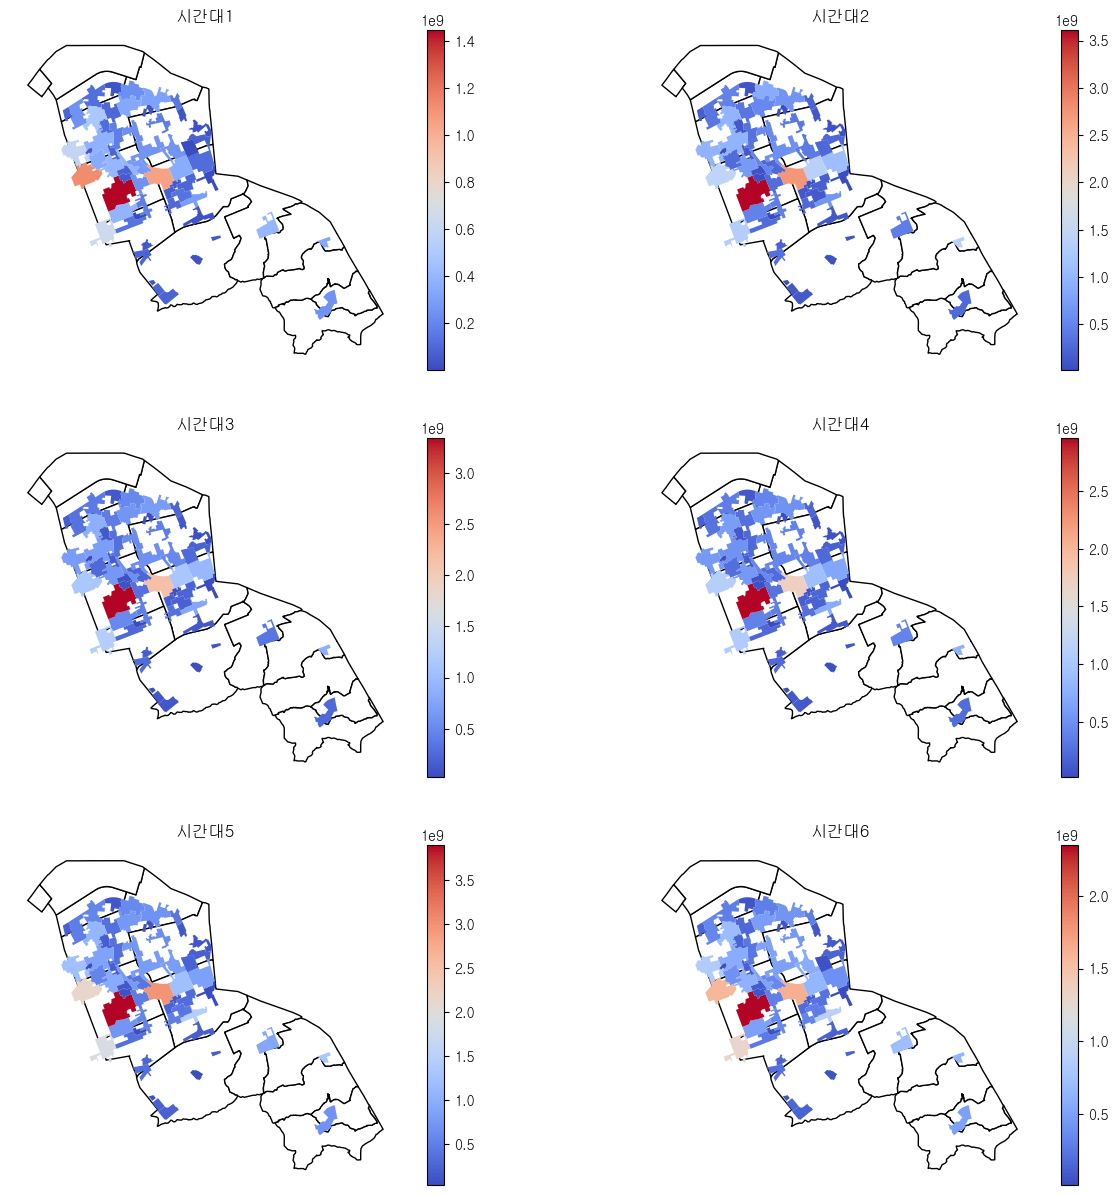

In [52]:
# 시각화
# 2003년 1분기 시간대별 시각화

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# 시간대 : 1
ax[0, 0].set_title('시간대1')
gangnam_gpd.plot(ax=ax[0, 0], color='white', edgecolor='black')
example_1.plot(column='시간대_매출금액', ax=ax[0, 0], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[0, 0].axis('off')

# 시간대 : 2
ax[0, 1].set_title('시간대2')
gangnam_gpd.plot(ax=ax[0, 1], color='white', edgecolor='black')
example_2.plot(column='시간대_매출금액', ax=ax[0, 1], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[0, 1].axis('off')

# 시간대 : 3
ax[1, 0].set_title('시간대3')
gangnam_gpd.plot(ax=ax[1, 0], color='white', edgecolor='black')
example_3.plot(column='시간대_매출금액', ax=ax[1, 0], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[1, 0].axis('off')

# 시간대 : 4
ax[1, 1].set_title('시간대4')
gangnam_gpd.plot(ax=ax[1, 1], color='white', edgecolor='black')
example_4.plot(column='시간대_매출금액', ax=ax[1, 1], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[1, 1].axis('off')

# 시간대 : 5
ax[2, 0].set_title('시간대5')
gangnam_gpd.plot(ax=ax[2, 0], color='white', edgecolor='black')
example_5.plot(column='시간대_매출금액', ax=ax[2, 0], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[2, 0].axis('off')

# 시간대 : 6
ax[2, 1].set_title('시간대6')
gangnam_gpd.plot(ax=ax[2, 1], color='white', edgecolor='black')
example_6.plot(column='시간대_매출금액', ax=ax[2, 1], marker='o', markersize=30, cmap='coolwarm', legend=True)
ax[2, 1].axis('off')

plt.show()

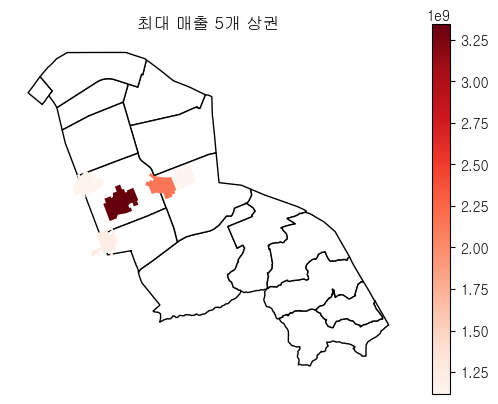

In [53]:
fig, ax = plt.subplots()
gangnam_gpd.plot(ax=ax, color='white', edgecolor='black')

ax.set_title('최대 매출 5개 상권')

# example_3.loc[example_1[['시간대_매출금액']].idxmax()].plot(column='시간대_매출금액', ax=ax, marker='o', markersize=30, cmap='coolwarm', legend=True)

# 색상 정하기
# colors = ['#FFA500', '#FF6347']  # 오렌지색에서 빨간색까지
# cmap = ListedColormap(colors)

# example_3.nlargest(5, '시간대_매출금액').plot(column='시간대_매출금액', ax=ax, marker='o', markersize=30, cmap=cmap, legend=True)

example_3.nlargest(5, '시간대_매출금액').plot(column='시간대_매출금액', ax=ax, marker='o', markersize=30, cmap='Reds', legend=True)
ax.axis('off')

plt.show()

# final_reordered 파일과 합치기

In [26]:
# GeoJSON 파일 경로
geo_file_path = "geo_json/gncom_gdf.geojson"
gncom_gdf = gpd.read_file(geo_file_path)
gncom_gdf

,상권_코드,상권_코드_명,행정동_코드,행정동_코드_명,geometry
0,3110968,강남구청역 2번,11680531,논현2동,"POLYGON ((127.04035 37.51615, 127.04060 37.515..."
1,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((127.05960 37.50777, 127.05944 37.507..."
2,3130310,강남개포시장,11680670,개포2동,"POLYGON ((127.06730 37.48832, 127.06655 37.488..."
3,3130309,은마종합상점가,11680610,대치2동,"POLYGON ((127.06435 37.49614, 127.06460 37.495..."
4,3130308,청담삼익시장,11680565,청담동,"POLYGON ((127.05813 37.52268, 127.05786 37.522..."
...,...,...,...,...,...
98,3110973,강남구청역 4번,11680565,청담동,"POLYGON ((127.04448 37.51951, 127.04507 37.519..."
99,3110972,강남세브란스병원미래의학연구센터,11680650,역삼2동,"POLYGON ((127.04154 37.49557, 127.04182 37.494..."
100,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((127.04007 37.50917, 127.04042 37.508..."
101,3110970,학동초등학교,11680531,논현2동,"POLYGON ((127.04135 37.51241, 127.04139 37.512..."


In [27]:
def calculate_center_point(gdf):
        gdf['center_point'] = gdf['geometry'].centroid
        gdf['geometry'] = gdf['geometry'].to_crs(epsg='4326')
        gdf['center_point'] = gdf['center_point'].to_crs(epsg='4326')
        gdf['latitude'] = gdf['center_point'].y
        gdf['longitude'] = gdf['center_point'].x
        return gdf

In [31]:
# 데이터 처리
gncom_gdf = calculate_center_point(gncom_gdf)
gncom_gdf

C:\Users\imhye\AppData\Local\Temp\ipykernel_37820\1792692485.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['center_point'] = gdf['geometry'].centroid


,상권_코드,상권_코드_명,행정동_코드,행정동_코드_명,geometry,center_point,latitude,longitude
0,3110968,강남구청역 2번,11680531,논현2동,"POLYGON ((127.04035 37.51615, 127.04060 37.515...",POINT (127.04018 37.51465),37.514655,127.040183
1,3001496,강남 마이스 관광특구,11680580,삼성1동,"POLYGON ((127.05960 37.50777, 127.05944 37.507...",POINT (127.05974 37.51109),37.511085,127.059737
2,3130310,강남개포시장,11680670,개포2동,"POLYGON ((127.06730 37.48832, 127.06655 37.488...",POINT (127.06760 37.48890),37.488895,127.067596
3,3130309,은마종합상점가,11680610,대치2동,"POLYGON ((127.06435 37.49614, 127.06460 37.495...",POINT (127.06365 37.49573),37.495732,127.063649
4,3130308,청담삼익시장,11680565,청담동,"POLYGON ((127.05813 37.52268, 127.05786 37.522...",POINT (127.05758 37.52236),37.522361,127.057578
...,...,...,...,...,...,...,...,...
98,3110973,강남구청역 4번,11680565,청담동,"POLYGON ((127.04448 37.51951, 127.04507 37.519...",POINT (127.04355 37.51883),37.518826,127.043547
99,3110972,강남세브란스병원미래의학연구센터,11680650,역삼2동,"POLYGON ((127.04154 37.49557, 127.04182 37.494...",POINT (127.04251 37.49455),37.494554,127.042511
100,3110971,선정릉역 4번,11680640,역삼1동,"POLYGON ((127.04007 37.50917, 127.04042 37.508...",POINT (127.04287 37.50728),37.507279,127.042874
101,3110970,학동초등학교,11680531,논현2동,"POLYGON ((127.04135 37.51241, 127.04139 37.512...",POINT (127.04122 37.51157),37.511567,127.041218


In [33]:
# 데이터프레임을 CSV 파일로 저장하는 코드
gncom_gdf.to_csv('data/gncom_gdf_processed.csv', index=False)

In [89]:
import pandas as pd

# 파일 경로
file_path = 'data/final_reordered.csv'

# CSV 파일을 데이터프레임으로 읽어오기
df = pd.read_csv(file_path)

# 상권_코드_명 별로 그룹화하여 시간대_매출금액의 평균 구하기
average_sales_by_region = df.groupby('상권_코드_명')['시간대_매출금액'].mean()

# 결과를 데이터프레임으로 변환
result_df = average_sales_by_region.reset_index()

# 결과를 CSV 파일로 저장
result_file_path = 'data/average_sales_by_region.csv'
result_df.to_csv(result_file_path, index=False)

In [91]:
import pandas as pd

# 파일 경로
average_sales_file_path = 'data/average_sales_by_region.csv'
gncom_gdf_processed_file_path = 'data/gncom_gdf_processed.csv'

# CSV 파일을 데이터프레임으로 읽어오기
average_sales_df = pd.read_csv(average_sales_file_path)
gncom_gdf_processed_df = pd.read_csv(gncom_gdf_processed_file_path)

# 상권_코드_명을 기준으로 inner join
merged_df = pd.merge(average_sales_df, gncom_gdf_processed_df, on='상권_코드_명', how='inner')

# 시간대_매출금액 컬럼을 시간대_매출금액_평균으로 변경
merged_df.rename(columns={'시간대_매출금액': '시간대_매출금액_평균'}, inplace=True)

# 결과를 CSV 파일로 저장
merged_file_path = 'data/map_data.csv'
merged_df.to_csv(merged_file_path, index=False)